## Import Dependencies

In [1]:
# utilities 
import re
import pickle
import pandas as pd
import numpy as np

# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import ToktokTokenizer

# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

# show all
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

## Import Dataset

In [2]:
DATASET_COLUMNS = ['sentiment', 'ids', 'date', 'flag', 'user', 'text']
DATASET_ENCODING = "ISO-8859-1"
dataset = pd.read_csv('training.1600000.processed.noemoticon.csv'
                      , encoding=DATASET_ENCODING
                      , names=DATASET_COLUMNS)

In [3]:
pd.set_option('display.max_colwidth', None)
dataset.sample(15)

,sentiment,ids,date,flag,user,text
1038065,4,1956615969,Thu May 28 22:16:30 PDT 2009,NO_QUERY,pick_nic,"@Zozoeex I'm exactly the same! Always get such a scare when I almost hit something, love it otherwise though"
588192,0,2216575896,Wed Jun 17 19:40:08 PDT 2009,NO_QUERY,MsHammett,Chillen....last nite in the burgh
1164958,4,1979804914,Sun May 31 04:34:33 PDT 2009,NO_QUERY,sunshine29,"@minxuan yup i'm in paris and so is he! last paper on tue, then traveling switz + germany + mediterranean sea!"
916322,4,1753291101,Sun May 10 00:56:38 PDT 2009,NO_QUERY,cursedbyevil,"Has about 10 hours work to do, on a Sunday. Boo. I will find time for a two hour lunchbreak though. Yeah"
1107495,4,1971591133,Sat May 30 07:27:06 PDT 2009,NO_QUERY,_missJP,@_RyanJ I know it will dear
1025510,4,1883518175,Fri May 22 08:40:42 PDT 2009,NO_QUERY,JunkRoxxx,@blasphem_e its so good
1576725,4,2189579055,Tue Jun 16 00:22:20 PDT 2009,NO_QUERY,hanwedge,"Really cannot be assed with the exam this afternoon. I hate business arghh, at least it's the last time I ever have to do it"
1279372,4,2001527867,Tue Jun 02 01:10:51 PDT 2009,NO_QUERY,Hager138,Haha to faded loving my new bong
509418,0,2189400975,Mon Jun 15 23:56:42 PDT 2009,NO_QUERY,juliantalented,@HeyItsMandyy i wanna be awesome
31829,0,1564112640,Mon Apr 20 01:50:24 PDT 2009,NO_QUERY,VincsonMoody,@JesseFyasko I missed it Did they have Edies funeral yet? lol


[Text(0, 0, 'Negative'), Text(1, 0, 'Positive')]

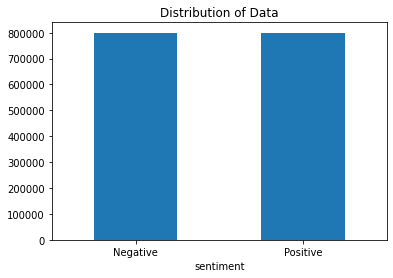

In [4]:
# Import Dataset
DATASET_COLUMNS = ['sentiment', 'ids', 'date', 'flag', 'user', 'text']
DATASET_ENCODING = "ISO-8859-1"
dataset = pd.read_csv('training.1600000.processed.noemoticon.csv'
                      , encoding=DATASET_ENCODING
                      , names=DATASET_COLUMNS)

# Removing the unnecessary columns
dataset = dataset[['sentiment', 'text']]
# Replace the values to ease understanding
dataset['sentiment'] = dataset['sentiment'].replace(4, 1)

# Plotting the distribution for dataset.
ax = dataset.groupby('sentiment').count().plot(kind = 'bar'
                                               , title = 'Distribution of Data'
                                               , legend = False)

ax.set_xticklabels(['Negative', 'Positive'], rotation = 0)

# Storing data in lists
text, sentiment = list(dataset['text']), list(dataset['sentiment'])

In [5]:
pd.set_option('display.max_colwidth', None)
dataset.sample(20)

,sentiment,text
638143,0,@freeintegrated CALL ME!!!!!!!!
1482479,1,@JustMarriedUs What is all this gay-men-having-crushes-on-lesbians disclosure the past couple of days??? I confessed 2 days ago!
1332396,1,"@jskohl6104 I know, I know. I can be a bit wishy-washy....I still love the Cubbies I just forgot I love the Braves too!"
1253389,1,@cle_mcfly reaally?? hahaha its really sweeeeet!
1203226,1,yogurt =
221436,0,Just had another sighting of the Fail Whale
956187,1,@g33kguy i did!? wow! awesome you got a pic?
559424,0,@Kristina_rawks so your in my bed
345496,0,Well im at bus traing.
640195,0,"My nans house issss SOLD!! its been theres for, about 30yr I GREW UP there now its gonee. *TEAR*"


## Processing Text

In [6]:
# Defining set containing all stopwords in english.
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

# Text Cleaning
TEXT_CLEANING_RE = '@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+'

# Defining dictionary containing all emojis with their meanings.
emojis = {':)': 'smile', ':-)': 'smile', ';d': 'wink', ':-E': 'vampire', ':(': 'sad', 
          ':-(': 'sad', ':-<': 'sad', ':P': 'raspberry', ':O': 'surprised',
          ':-@': 'shocked', ':@': 'shocked',':-$': 'confused', ':\\': 'annoyed', 
          ':#': 'mute', ':X': 'mute', ':^)': 'smile', ':-&': 'confused', '$_$': 'greedy',
          '@@': 'eyeroll', ':-!': 'confused', ':-D': 'smile', ':-0': 'yell', 'O.o': 'confused',
          '<(-_-)>': 'robot', 'd[-_-]b': 'dj', ":'-)": 'sadsmile', ';)': 'wink', 
          ';-)': 'wink', 'O:-)': 'angel','O*-)': 'angel','(:-D': 'gossip', '=^.^=': 'cat'}

In [7]:
def processing(textdata):
    processedText = []
    
    # Create Lemmatizer and Stemmer
    wordLemm = WordNetLemmatizer()
    
    # Defining regex patterns.
    urlPattern        = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
    userPattern       = '@[^\s]+'
    alphaPattern      = "[^a-zA-Z0-9]"
    sequencePattern   = r"(.)\1\1+"
    seqReplacePattern = r"\1\1"
    
    for tweet in textdata:
        tweet = tweet.lower()
        
        # Replace all URLs wish "URl"
        tweet = re.sub(urlPattern, 'URl', tweet)
        # Replace all emojis.
        for emoji in emojis.keys():
            tweet = tweet.replace(emoji, "EMOJI" + emojis[emoji])
        # Replace @Username wish 'USER'
        tweet = re.sub(userPattern, 'USER', tweet)
        # Replace all non alphabets
        tweet = re.sub(alphaPattern, ' ', tweet)
        # Replace 3 or more consecutive letters by 2 letter.
        tweet = re.sub(sequencePattern, seqReplacePattern, tweet)
        
        tweetwords = ''
        for word in tweet.split():
            # Checking if the word is a stopword.
            if word not in stop_words:
                if len(word)>1:
                    # Lemmatizing the word.
                    word = wordLemm.lemmatize(word)
                    tweetwords += (word+' ')
                
        processedText.append(tweetwords)
        
    return processedText

In [8]:
import time
t = time.time()
processedtext = processing(text)
print(f'Text Preprocessing complete.')
print(f'Time Taken:{round(time.time()-t)}seconds')

Text Preprocessing complete.
Time Taken:124seconds


## Word-Cloud

<Figure size 1440x1440 with 0 Axes>

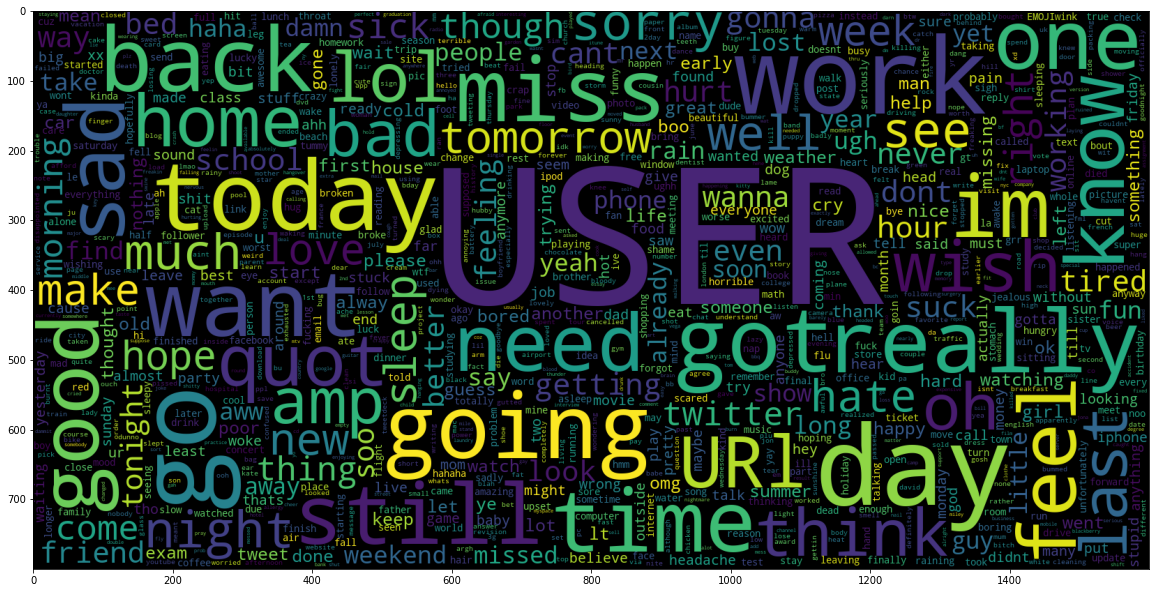

In [9]:
# Word-Cloud for Negative tweets.
data_neg = processedtext[:800000]
plt.figure(figsize = (20, 20))
wc = WordCloud(max_words= 1000, width = 1600, height = 800
               , collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)
plt.savefig('Negative Tweets World Cloud.png')

<Figure size 1440x1440 with 0 Axes>

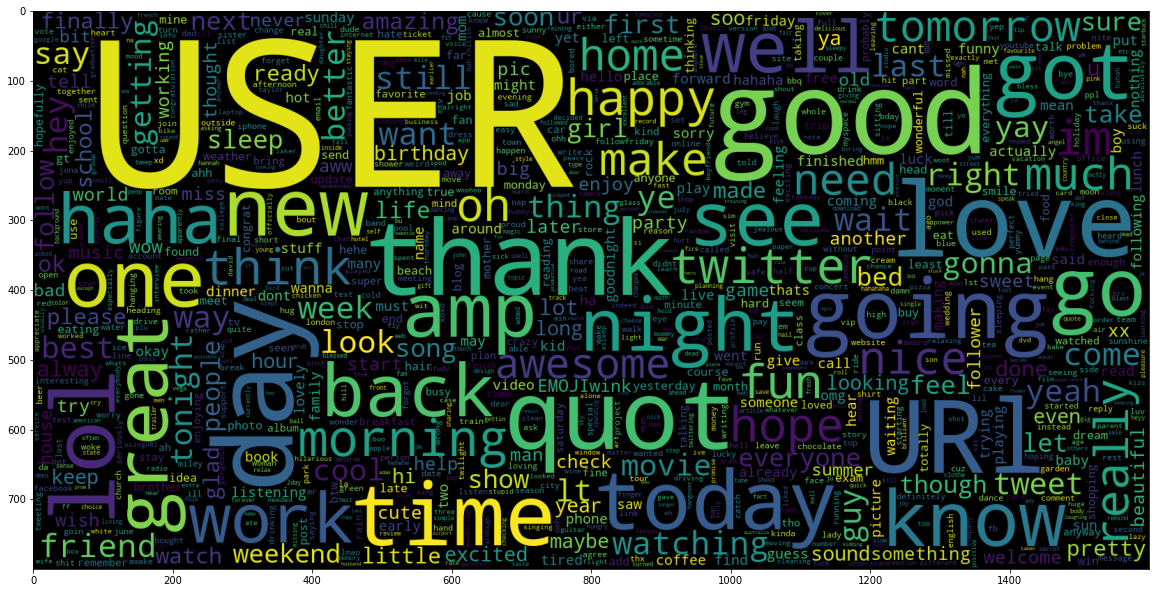

In [10]:
# Word-Cloud for Positive tweets.
data_pos = processedtext[800000:]
plt.figure(figsize = (20, 20))
wc = WordCloud(max_words= 1000, width = 1600, height = 800
               , collocations=False).generate(" ".join(data_pos))
plt.imshow(wc)
plt.savefig('Positive Tweets World Cloud.png')

## Split the data

In [11]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(processedtext, sentiment
                                                    , test_size=0.05, random_state = 0)

print(f'Data Split done')

Data Split done


## TF-IDF Vectoriser

In [12]:
# TF-IDF Vectoriser
vectoriser = TfidfVectorizer(ngram_range=(1, 2), max_features=500000)
vectoriser.fit(X_train)
print(f'Vectoriser fitted')
print('No. of feature_words:', len(vectoriser.get_feature_names()))

TfidfVectorizer(max_features=500000, ngram_range=(1, 2))

Vectoriser fitted
No. of feature_words: 500000


In [13]:
# Tranforming the dataset
X_train = vectoriser.transform(X_train)
X_test = vectoriser.transform(X_test)
print(f'Data Transformed')

Data Transformed


## Evaluating Models

In [14]:
# Evaluating Models : 
# Bernoulli Naive Bayes (BernoulliNB), Linear Support Vector Classification (LinearSVC), Logistic Regression (LR)
def model_Evaluate(model):
    
    # Predict values for Test data.
    y_pred = model.predict(X_test)
    
    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
    
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)
    
    categories = ['Negative', 'Positive']
    group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    
    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names, group_percentages)]
    labels = np.asarray(labels).reshape(2, 2)
    
    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues', fmt = ''
                , xticklabels = categories, yticklabels = categories)
    
    plt.xlabel('Predicted values', fontdict = {'size':14}, labelpad = 10)
    plt.ylabel('Actual values', fontdict = {'size':14}, labelpad = 10)
    plt.title('Confusion Matrix', fontdict = {'size':20}, pad = 10)

              precision    recall  f1-score   support

           0       0.79      0.77      0.78     39989
           1       0.78      0.80      0.79     40011

    accuracy                           0.78     80000
   macro avg       0.78      0.78      0.78     80000
weighted avg       0.78      0.78      0.78     80000

CPU times: user 840 ms, sys: 129 ms, total: 969 ms
Wall time: 973 ms


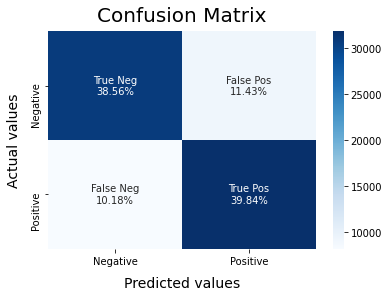

In [15]:
%%time
# Bernoulli Naive Bayes (BernoulliNB) Model
BNBmodel = BernoulliNB(alpha = 2)
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)

              precision    recall  f1-score   support

           0       0.79      0.77      0.78     39989
           1       0.78      0.80      0.79     40011

    accuracy                           0.78     80000
   macro avg       0.79      0.78      0.78     80000
weighted avg       0.79      0.78      0.78     80000

CPU times: user 30.7 s, sys: 212 ms, total: 30.9 s
Wall time: 30.9 s


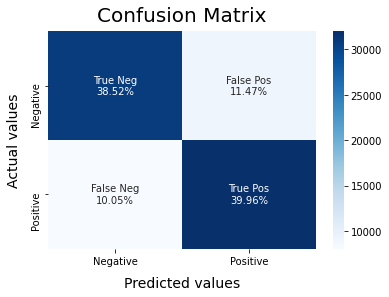

In [16]:
%%time
# Linear Support Vector Classification (LinearSVC) Model
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)

              precision    recall  f1-score   support

           0       0.81      0.78      0.79     39989
           1       0.79      0.81      0.80     40011

    accuracy                           0.80     80000
   macro avg       0.80      0.80      0.80     80000
weighted avg       0.80      0.80      0.80     80000

CPU times: user 473 ms, sys: 231 ms, total: 704 ms
Wall time: 2min 18s


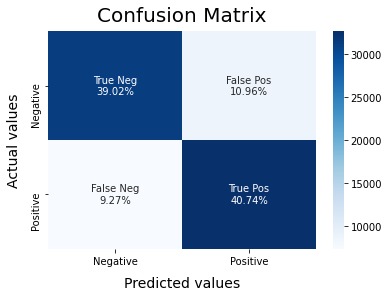

In [17]:
%%time
# Logistic Regression (LR) Model
LRmodel = LogisticRegression(C = 2, max_iter=1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel)

In [18]:
# the Logistic Regression Model performs the best, the BernoulliNB Model is the fastest
# Saving the Models and Vectoriser
file = open('vectoriser-ngram-(1, 2).pickle', 'wb')
pickle.dump(vectoriser, file)
file.close()

file = open('Sentiment-LR.pickle', 'wb')
pickle.dump(LRmodel, file)

file = open('Sentiment-SVC.pickle', 'wb')
pickle.dump(SVCmodel, file)

file = open('Sentiment-BNB.pickle', 'wb')
pickle.dump(BNBmodel, file)
file.close()

# MMA Data

## Import Data

In [19]:
# Import Data
DATASET_ENCODING = "utf-8"
dataset = pd.read_csv('MMA_tweets_data.csv'
                      , encoding=DATASET_ENCODING)

# Removing the unnecessary columns and Storing data in lists
text = list(dataset['Tweet'].astype(str))
text

['The Notorious Tiger @beatsbydre! \nThank you Jimmy and Dre 🐅 🎧 https://t.co/f5El6alw4U',
 'I am honored to announce I have re-signed with @monsterenergy! \nThey have had my back through tick and thin and in particular @hansmolenkamp! \nA man who has helped build this brand to… https://t.co/8r02g7ryDH',
 'The 6 God and The 12 animal! https://t.co/S1KfNlwam3',
 '2 more days @ Las Vegas, Nevada https://t.co/n6TX5FRHEt',
 'Play as me in #EAUFC3 and bring the belt back to Dagestan. InshAllah #EAathlete #EAUFC3 #AndStill https://t.co/ltXkzsdIzs',
 'Wednesday \n#ufc229 #победатолькоотВсевышнего \n📸 frujuice_athletics https://t.co/6oi1e8Rcgt',
 'THE 👑 IS BACK BABY! 🇮🇪 #UFC229 #EAUFC3 https://t.co/XmWQkbHd2h https://t.co/wBxgs59rnb',
 'Tuesday \n#ufc229 @ Las Vegas, Nevada https://t.co/iTwlWupe7N',
 'The best tasting recovery supplement I’ve had. Fuel Your Greatness like the Champ Champ! @Ryse_Supps #RyseUp #UFC229 https://t.co/M2qkjSKHXp',
 'The face. https://t.co/xrBGSm9sr7',
 'Gene Kilroy 

## load model and use

In [20]:
def load_models():
    '''
    Replace '..path/' by the path of the saved models.
    '''
    
    # Load the vectoriser.
    file = open('vectoriser-ngram-(1, 2).pickle', 'rb')
    vectoriser = pickle.load(file)
    file.close()
    # Load the LR Model.
    file = open('Sentiment-LR.pickle', 'rb')
    LRmodel = pickle.load(file)
    file.close()
    
    return vectoriser, LRmodel

def predict(vectoriser, model, text):
    # Predict the sentiment
    textdata = vectoriser.transform(processing(text))
    sentiment = model.predict(textdata)
    
    # Make a list of text with sentiment.
    data = []
    for text, pred in zip(text, sentiment):
        data.append((text,pred))
        
    # Convert the list into a Pandas DataFrame.
    df = pd.DataFrame(data, columns = ['text','sentiment'])
    df = df.replace([0,1], ["Negative","Positive"])
    return df

if __name__=="__main__":
    # Loading the models.
    vectoriser, LRmodel = load_models()
    
    # Text to classify should be in a list.
#     text = ["I hate twitter",
#             "May the Forc``````e be with you.",
#             "Mr. Stark, I don't feel so good",
#             '20 days', 
#             'honored announce signed back tick thin particular man helped build brand']
    
    df_LR = predict(vectoriser, LRmodel, text)
    print(df_LR.head())

                                                                                                                                                                                                                 text  \
0                                                                                                                              The Notorious Tiger @beatsbydre! \nThank you Jimmy and Dre 🐅 🎧 https://t.co/f5El6alw4U   
1  I am honored to announce I have re-signed with @monsterenergy! \nThey have had my back through tick and thin and in particular @hansmolenkamp! \nA man who has helped build this brand to… https://t.co/8r02g7ryDH   
2                                                                                                                                                                The 6 God and The 12 animal! https://t.co/S1KfNlwam3   
3                                                                                                                                   

## Observe Positive and Negative Data

In [21]:
# SVCmodel
pd.set_option('display.max_colwidth', None)
df_Pos_LR = df_LR.loc[df_LR['sentiment'] == 'Positive']
df_Pos_LR.shape
df_Pos_LR.sample(10)

(252977, 2)

,text,sentiment
127159,EA: RT EASPORTSUFC: STEP INTO THE OCTAGON AND PLAY THE FIGHT BEFORE THE FIGHT!\nTeamKhabib 🇷🇺🦅 VS TheNotoriousMMA 🇮🇪👊 #UFC229 https://t.co/mgittU3RR4 #EA #EASports #Battlefront #NBA2k #NHL,Positive
158202,"I've been away but @robinblackmma so glad the UFC added your Canucklehead arse to @UFCFightPass CREW. Damn time your skill and knowledge was added to ""The F'n SHOW"". Big things induced by Hard Work and Drive are an INSIPRATION to us regular folk.Hank you my Brother.",Positive
71219,The latest All Powers Press! https://t.co/hv0SSMIeA5 Thanks to @premierboxing @MattLowPT @WBCBoxing #ufc229 #buildyourbody,Positive
297899,@darrentill2 @rednich85 @ufc 😂😭😂 savage,Positive
11106,"Hot take from someone who does not follow UFC, McGregor is not winning tonight.",Positive
108585,"@AEastwood100 @MayorTufono @TheNotoriousMMA @ProperWhiskey with that said, you live in Tralee so all is well. ✌☘✌",Positive
5737,@iamjuanitoo @TheNotoriousMMA You don’t even know the guy,Positive
128590,"@uxsheridan One, who are the UFC champs, two, have you ever fought a wrestler? Sounds like you’ve got some experience.",Positive
161968,"@MisterShifters @MIKERUSSELLMMA @Sunkist1207 @bfield999 @TheNotoriousMMA LMAO, to write that after your temper tantrum here is rich dude.",Positive
298903,@SephJo_ @JosephC78027461 @FloydMayweather @TheNotoriousMMA It doesn’t take energy to turtle up and run away,Positive


In [22]:
# SVCmodel
pd.set_option('display.max_colwidth', None)
df_Neg_LR = df_LR.loc[df_LR['sentiment'] == 'Negative']
df_Neg_LR.shape
df_Neg_LR.head(10)

(86158, 2)

,text,sentiment
31,Now I understand #usada is n.1 bullshit people.\nTo much politics.,Negative
33,NY stand up \nDon’t miss #ufc229 press conference. 20 September. 5pm\n#McTaperSoldiers https://t.co/gtkcAWjEe5,Negative
39,The Notorious and The Godfather. \nKiss on the cheek you’re dead. https://t.co/RFfOesGehx,Negative
53,Suck my blood. https://t.co/39bNB2XI5P,Negative
54,"Coach, today you closed me in the octagon with a 5 round and in each round I let on fresh opponents, and you say I did a bad job? \nWhat’s wrong with you coach ?😄\nThats why we on top of… https://t.co/1bt4qHXkK3",Negative
58,Go to room 112. Tell them blanco sent you.,Negative
84,@blakeillg21 @hunter_win @TheNotoriousMMA You finna lose 100$ 😂,Negative
97,"#UFC229 prelim picks :\n\nHoltzman in a decision over Patrick\nEvinger upsets Ladd, Aspen is the future, but I really think the weight took too much out of her against a veteran\nLuque over Turner in a slugfest\nPettis keeps it standing to beat Formiga in a decision.",Negative
110,So it turns out that the only way to watch the fight tonight is in BT Sport which I don't have. Don't know why you can't buy the PPV on @ufc Fight Pass 😩 #UFC229,Negative
111,Fight night! #nevada #ufc #tmobilearena #bts #vegas #nightlife #video #productionlife @ T-Mobile Arena https://t.co/TxALknJUFI,Negative


In [23]:
df_Neg_LR.to_csv('MMA_Neg_classifier.csv', index = False)

## Random Select Row and Human Label

In [24]:
df_Neg_HuLa = df_Neg_LR.sample(n = 3000)
df_Neg_HuLa.head()

,text,sentiment
183389,so its @TheNotoriousMMA fault then!!! https://t.co/8gjurkvLFz,Negative
137567,@ufc Conor’s act is getting old.,Negative
267774,@ufc @bambamtuivasa Now he has athlete's foot in his guts,Negative
214092,@InjuryB @ufc That happened to fly over from america 😊,Negative
175422,"""Don't come at the king! Don't ever come at the king.....and If you do, don't miss!""\n\n- @TheNotoriousMMA\n\n#UFC229\n#UFC229PressConference https://t.co/xwF88XH5WO",Negative


In [25]:
df_Neg_HuLa.to_csv('MMA_data_Human_Label.csv', index = False)